In [14]:
import os
import sklearn
import warnings
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning)
sklearn.set_config(print_changed_only=True)

In [15]:
train_path = 'input/inputTrain.csv'
train_df = pd.read_csv(train_path)
train_df.drop(columns=['Unnamed: 0', 'carid'], inplace=True)
train_df.T

,0,1,2,3,4,5,6,7,8,9,...,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998
tradeTime,0.840336,0.827731,0.802521,0.844538,0.848739,0.756303,0.789916,0.920168,0.974790,0.718487,...,0.802521,-0.655462,0.873950,0.235294,0.546218,0.701681,-0.798319,-0.310924,-0.130252,-0.012605
mileage,-0.534415,0.315772,1.028558,-0.089701,-0.154414,0.810883,0.082312,-0.379565,1.083441,-0.204128,...,-0.637535,-0.402953,0.100099,0.056000,-0.136970,0.538139,0.680581,0.478198,0.441610,-0.558113
color_1,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
color_2,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
color_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l6,0.668317,-0.049505,-0.222772,1.074257,0.574257,-0.198020,0.222772,-0.148515,-0.143564,-0.173267,...,0.985149,0.841584,-0.074257,0.970297,1.014851,0.396040,-0.049505,0.099010,-0.198020,-0.168317
l7,-1.175993,-0.271037,-0.715401,-0.235116,-0.813323,-1.280552,-1.730886,-0.130919,-0.499289,-0.334701,...,0.454206,0.105606,-0.430253,0.416118,0.167502,-1.196486,0.693357,-0.568485,0.480517,0.405306
l8,-0.247441,-0.252904,-0.604505,0.635244,-0.169895,-0.937574,-0.769392,-0.273900,-0.481734,-0.475091,...,0.941090,0.705644,-0.333004,0.940380,0.847939,-0.369935,0.270279,-0.047498,0.040985,-0.002290
l9,0.229515,-0.226296,-0.531781,0.918661,0.311352,-0.627546,-0.475458,-0.273810,-0.352787,-0.290792,...,1.062477,0.741570,-0.313537,1.007418,0.964963,-0.112968,0.009225,-0.362698,-0.199016,-0.164260


In [16]:
X = train_df.drop(columns='price').to_numpy()
y = train_df['price'].values

In [17]:
def criterion(pred, y):
    dy = np.abs(pred - y) / y
    mape = np.sum(dy) / len(pred)
    acc = len(dy[dy <= 0.05]) / len(pred)
    return 0.2 * (1 - mape) + 0.8 * acc

In [18]:
model_num = 3
if model_num == 2:
    result_df = {'weights': [], 'acc': []}
else:
    result_df = {'w1': [], 'w2': [], 'acc': []}

Fold 0 Testing
Fitting Models...
Fitting Models Done


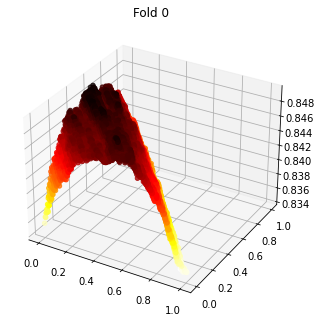

Fold 1 Testing
Fitting Models...
Fitting Models Done


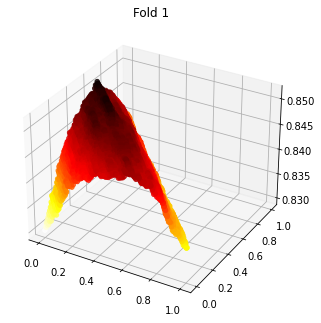

Fold 2 Testing
Fitting Models...
Fitting Models Done


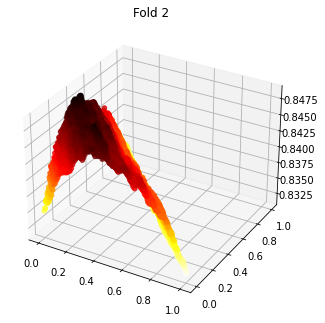

Fold 3 Testing
Fitting Models...
Fitting Models Done


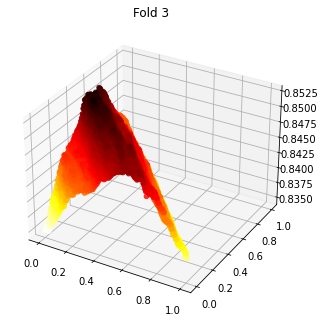

Fold 4 Testing
Fitting Models...
Fitting Models Done


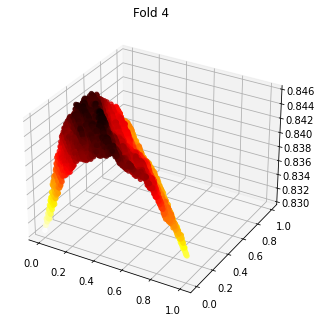

Fold 5 Testing
Fitting Models...
Fitting Models Done


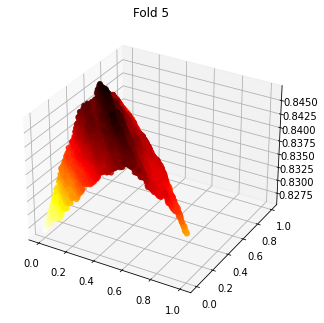

Fold 6 Testing
Fitting Models...
Fitting Models Done


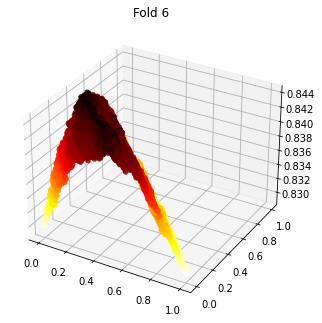

Fold 7 Testing
Fitting Models...
Fitting Models Done


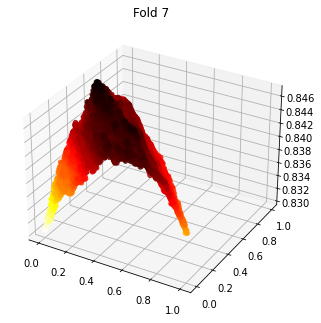

Fold 8 Testing
Fitting Models...
Fitting Models Done


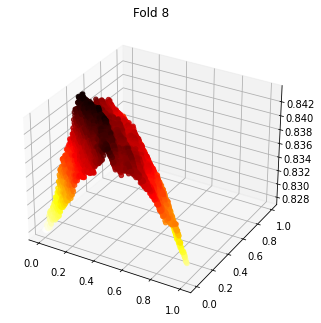

Fold 9 Testing
Fitting Models...
Fitting Models Done


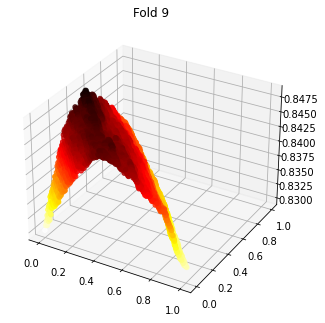

Fold 10 Testing
Fitting Models...
Fitting Models Done


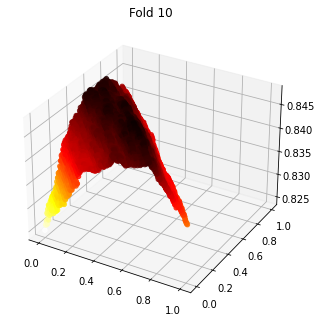

Fold 11 Testing
Fitting Models...
Fitting Models Done


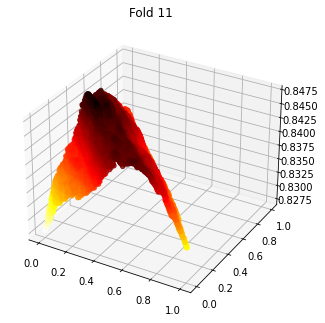

Fold 12 Testing
Fitting Models...
Fitting Models Done


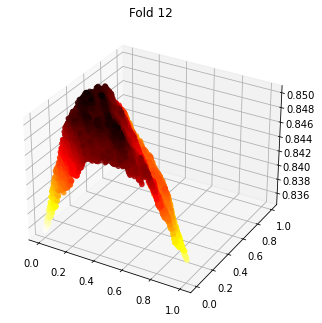

Fold 13 Testing
Fitting Models...
Fitting Models Done


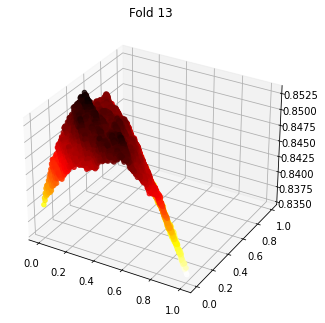

Fold 14 Testing
Fitting Models...
Fitting Models Done


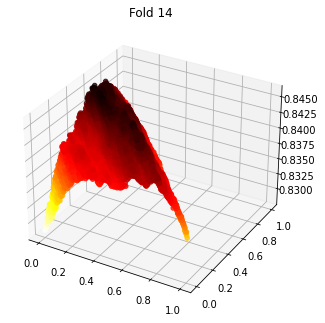

Fold 15 Testing
Fitting Models...
Fitting Models Done


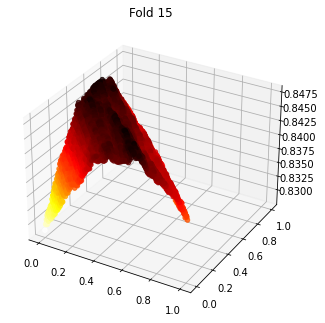

Fold 16 Testing
Fitting Models...
Fitting Models Done


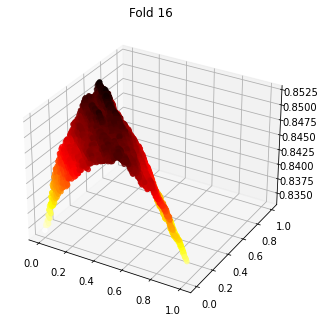

Fold 17 Testing
Fitting Models...
Fitting Models Done


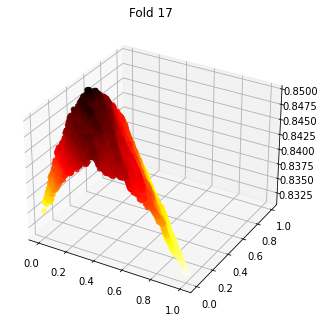

Fold 18 Testing
Fitting Models...
Fitting Models Done


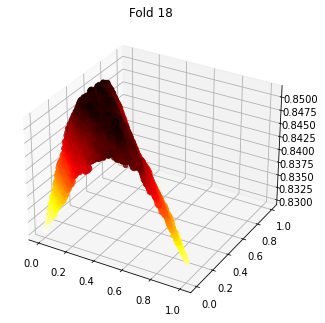

Fold 19 Testing
Fitting Models...
Fitting Models Done


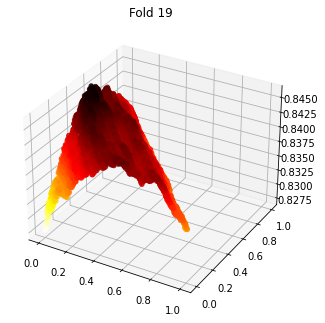

Fold 20 Testing
Fitting Models...
Fitting Models Done


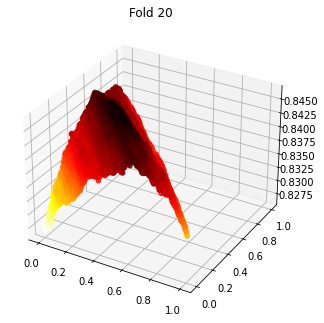

Fold 21 Testing
Fitting Models...
Fitting Models Done


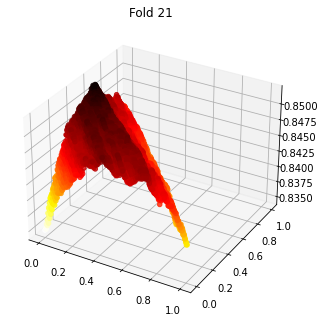

Fold 22 Testing
Fitting Models...
Fitting Models Done


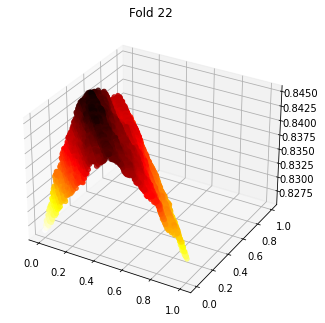

Fold 23 Testing
Fitting Models...
Fitting Models Done


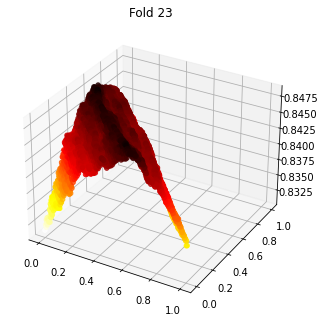

Fold 24 Testing
Fitting Models...
Fitting Models Done


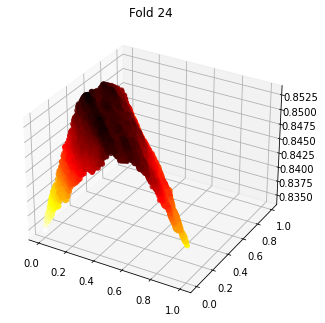

Fold 25 Testing
Fitting Models...
Fitting Models Done


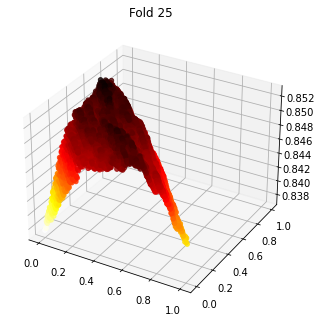

Fold 26 Testing
Fitting Models...
Fitting Models Done


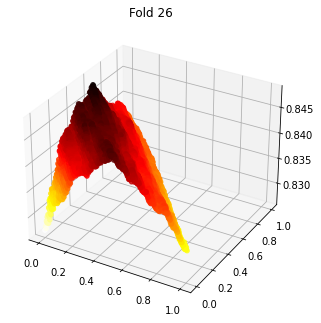

Fold 27 Testing
Fitting Models...
Fitting Models Done


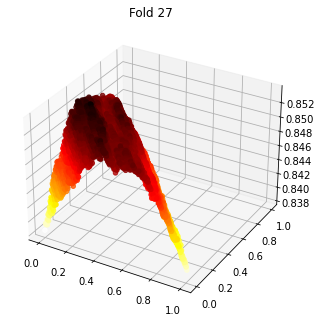

Fold 28 Testing
Fitting Models...
Fitting Models Done


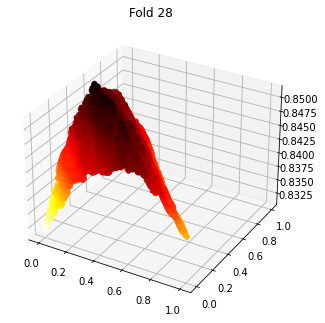

Fold 29 Testing
Fitting Models...
Fitting Models Done


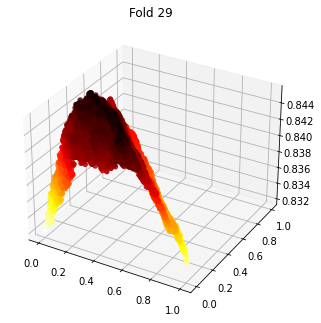

Fold 30 Testing
Fitting Models...
Fitting Models Done


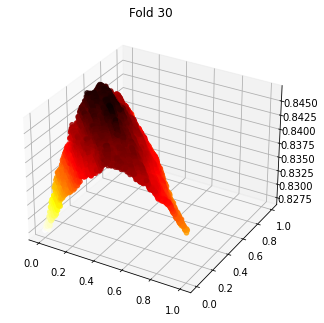

Fold 31 Testing
Fitting Models...
Fitting Models Done


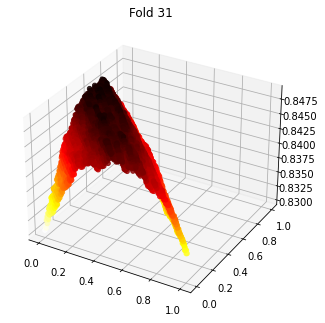

Fold 32 Testing
Fitting Models...
Fitting Models Done


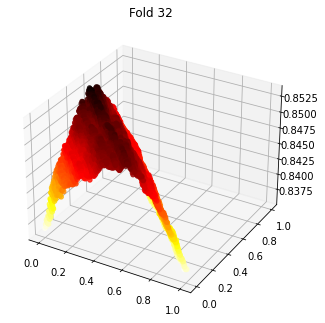

Fold 33 Testing
Fitting Models...
Fitting Models Done


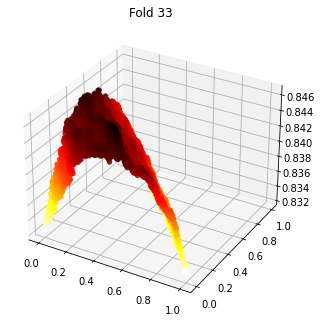

Fold 34 Testing
Fitting Models...
Fitting Models Done


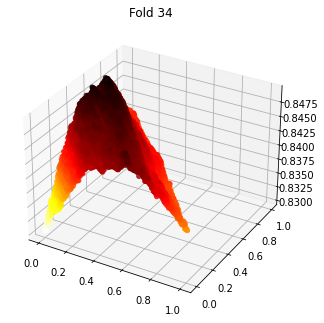

Fold 35 Testing
Fitting Models...
Fitting Models Done


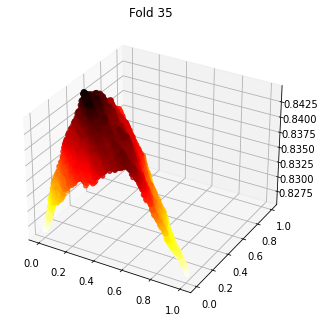

Fold 36 Testing
Fitting Models...
Fitting Models Done


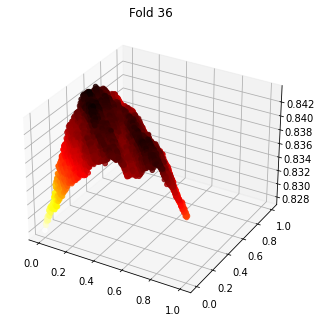

Fold 37 Testing
Fitting Models...
Fitting Models Done


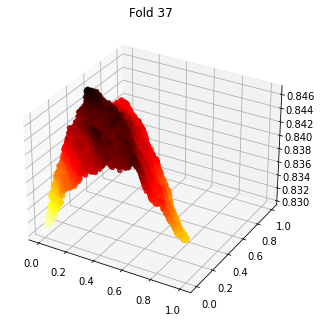

Fold 38 Testing
Fitting Models...
Fitting Models Done


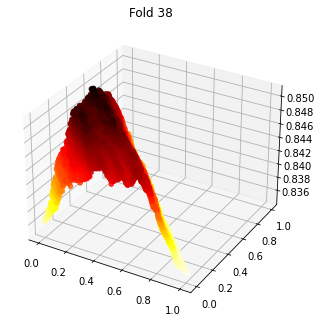

Fold 39 Testing
Fitting Models...
Fitting Models Done


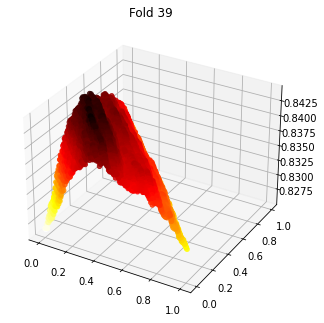

Fold 40 Testing
Fitting Models...
Fitting Models Done


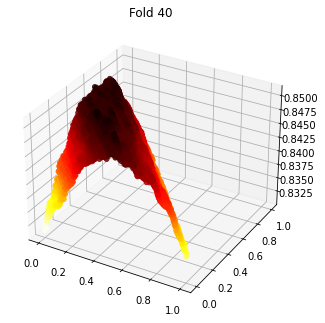

Fold 41 Testing
Fitting Models...
Fitting Models Done


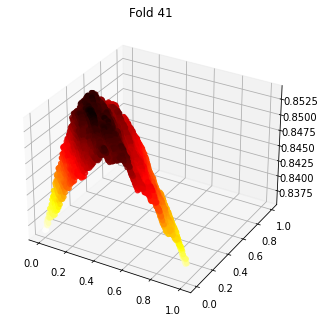

Fold 42 Testing
Fitting Models...
Fitting Models Done


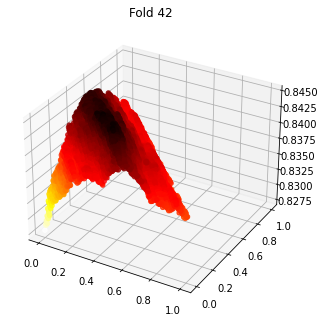

Fold 43 Testing
Fitting Models...
Fitting Models Done


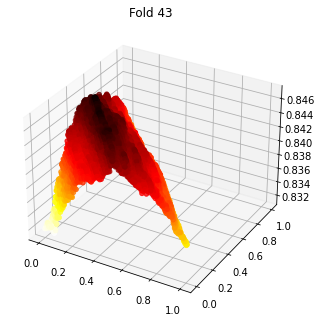

Fold 44 Testing
Fitting Models...
Fitting Models Done


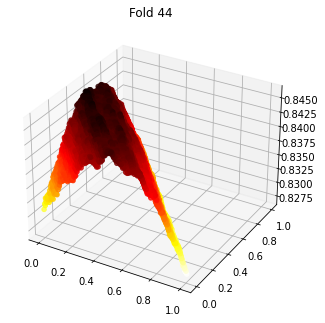

Fold 45 Testing
Fitting Models...
Fitting Models Done


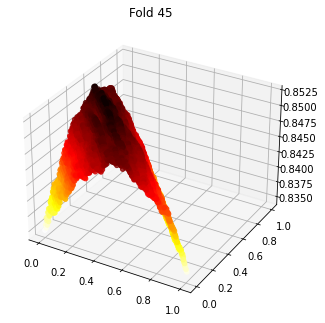

Fold 46 Testing
Fitting Models...
Fitting Models Done


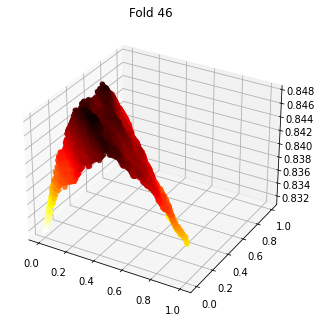

Fold 47 Testing
Fitting Models...
Fitting Models Done


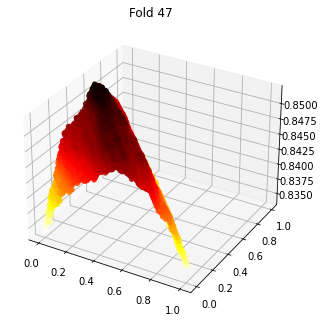

Fold 48 Testing
Fitting Models...
Fitting Models Done


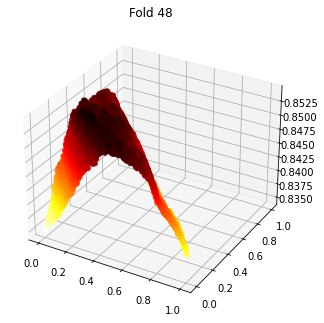

Fold 49 Testing
Fitting Models...
Fitting Models Done


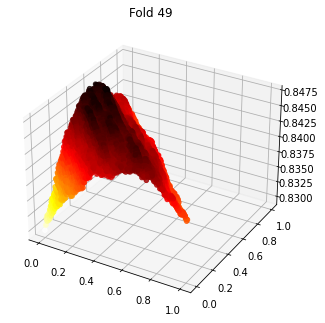

In [19]:
m = 10
n = 5
for fold in range(m * n):
    print("Fold", fold, 'Testing')
    X = train_df.drop(columns='price').to_numpy()
    y = train_df['price'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=fold)
    
    model_XGB = make_pipeline(
        StackingEstimator(estimator=xgb.XGBRegressor(learning_rate=0.001,
                                                        max_depth=1,
                                                        min_child_weight=2,
                                                        n_estimators=100,
                                                        objective='reg:squarederror',
                                                        subsample=0.6500000000000001)),
        RandomForestRegressor(bootstrap=False,
                                max_features=0.5,
                                min_samples_leaf=2,
                                min_samples_split=2,)
    )

    model_RFR = RandomForestRegressor(bootstrap=False,
                                    max_features=0.5,
                                    min_samples_leaf=2,
                                    min_samples_split=2,
                                    n_estimators=100
                                    )

    if model_num == 3:
        model_GBR = GradientBoostingRegressor(alpha=0.99,
                                            learning_rate=0.1,
                                            loss='lad',
                                            max_depth=9,
                                            max_features=0.6,
                                            min_samples_leaf=14,
                                            min_samples_split=10,
                                            n_estimators=100,
                                            subsample=1.0)

    
    if model_num == 2:
        final_model = [model_XGB, model_RFR]
    else:
        final_model = [model_XGB, model_RFR, model_GBR]

    # Train each model
    print('Fitting Models...')
    pred_test = np.empty((y_test.shape[0],1), int)
    for model in final_model:
        model.fit(X_train, y_train)
        pred_y = model.predict(X_test).reshape(y_test.shape[0],1)
        pred_test = np.append(pred_test, pred_y, axis=1)
    pred_test = pred_test[:,1:]
    print('Fitting Models Done')


    if len(final_model) == 2:
        prediction_1 = pred_test[:,0]
        prediction_2 = pred_test[:,1]
        x = []
        y = []

        for w in np.arange(0, 1.01, 0.01):
            final_pred = w * prediction_1 + (1 - w) * prediction_2
            acc = criterion(final_pred, y_test)
            x.append(w)
            y.append(acc)
            result_df['weights'].append(w)
            result_df['acc'].append(acc)

        plt.subplot(m, n, fold + 1)
        plt.plot(x, y)
        plt.title("Fold " + str(fold))

        
    else:
        prediction_1 = pred_test[:,0]
        prediction_2 = pred_test[:,1]
        prediction_3 = pred_test[:,2]
        x = []
        y = []
        z = []

        for w1 in np.arange(0, 1.01, 0.01):
            for w2 in np.arange(0, 1.01 - w1, 0.01):
                final_pred = w1 * prediction_1 + w2 * prediction_2 + (1 - w1 - w2) * prediction_3
                acc = criterion(final_pred, y_test)
                x.append(w1)
                y.append(w2)
                z.append(acc)
                result_df['w1'].append(w1)
                result_df['w2'].append(w2)
                result_df['acc'].append(acc)
            
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(x, y, z, c = z, alpha = 0.8, cmap=plt.cm.hot_r)
        plt.title("Fold " + str(fold))
        plt.show()

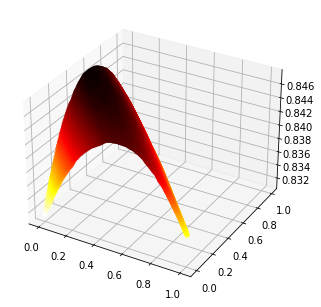

Best weight w1: 0.03 w2 0.52


In [21]:
if len(final_model) == 2:
    result = pd.DataFrame(result_df)
    result = result.by('weights').mean()
    x = np.arange(0, 1.01, 0.01)
    y = result['acc'].values
    plt.plot(x, y)
    plt.show()
    print('Best weight', 0.01 * y.argmax())

else:
    result = pd.DataFrame(result_df)
    result = result.groupby(['w1', 'w2']).mean()
    x = []
    y = []
    for w1 in np.arange(0, 1.01, 0.01):
        for w2 in np.arange(0, 1.01 - w1, 0.01):
            x.append(w1)
            y.append(w2)
    
    z = result['acc'].values
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c = z, alpha = 0.8, cmap=plt.cm.hot_r)
    plt.show()
    
    i = 0
    index = z.argmax()
    for w1 in np.arange(0, 1.01, 0.01):
        is_found = False
        for w2 in np.arange(0, 1.01 - w1, 0.01):
            if i != index:
                i += 1
            else:
                print('Best weight', 'w1:', w1, 'w2', w2)
                is_found = True
                break
        if is_found:
            break